In [17]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [18]:
nino3_hist = np.genfromtxt('tas_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0850_1850_1_nino3_tseries.csv', delimiter=",")
#ismr_hist = np.genfromtxt('psl_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0850_1850_1_india_goswami_2002_tseries.csv', delimiter=",")
ismr_hist = np.genfromtxt('pr_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0850_1850_india_goswami_2002_tseries.csv', delimiter=",")
nino3_pi = np.genfromtxt('tas_Amon_IPSL-CM5A-LR_piControl_r1i1p1_180001-279912_1_nino3_tseries.csv', delimiter=",")
#ismr_pi = np.genfromtxt('psl_cfMon_IPSL-CM5A-LR_piControl_r1i1p1_180001-279912_1_india_goswami_2002_tseries.csv', delimiter=",")
ismr_pi = np.genfromtxt('pr_Amon_IPSL-CM5A-LR_piControl_r1i1p1_180001-279912_india_tseries.txt', delimiter=",")

vrf_1 = np.genfromtxt ('sigl.txt', delimiter=",")
vrf = vrf_1[0:1000]

print(nino3_hist.shape)
print(nino3_pi.shape)

(12012,)
(12000,)


In [19]:
def common_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time
def yearly_time_axis(dvolc, verbose=True):
    """
    Generates time axis for yearly data 
    """
    Nt = len(dvolc)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dvolc)):
        y = time[i - 1].year
        y += 1
        time.append(dt.datetime(y, 1, 15))
    time = np.array(time)

    return time
def moving_average_anomaly(dismr,n=360):
    """
    Generates moving average anomaly of long time series
    """
    #print(dismr.shape)
    dismr_anom = np.zeros((dismr.shape[0]))
    dismr_std = np.zeros((dismr.shape[0]))
    dismr_anom[0:np.int(n/2)] = ( dismr[0:np.int(n/2)] - np.mean(dismr[0:n]) )/np.std(dismr[0:n])
    dismr_anom[dismr.shape[0]-np.int(n/2):] = ( dismr[dismr.shape[0]-np.int(n/2):] - np.mean(dismr[dismr.shape[0]-n:]) )/np.std(dismr[dismr.shape[0]-n:])
    #print(dismr_anom)
    dismr_std[0:np.int(n/2)] = np.std(dismr[0:n])
    dismr_std[dismr.shape[0]-np.int(n/2):] = np.std(dismr[dismr.shape[0]-n:])
    
    for i in range(np.int(n/2),np.int(dismr.shape[0]-n/2)):
        dismr_anom[i] = (dismr[i] - np.mean(dismr[i-np.int(n/2):i+np.int(n/2)]))/np.std(dismr[i-np.int(n/2):i+np.int(n/2)])
        dismr_std[i] = np.std(dismr[i-np.int(n/2):i+np.int(n/2)])
    return dismr_anom, dismr_std

In [20]:
mon_time = common_time_axis(ismr_pi)
year_time = yearly_time_axis(vrf[0:1000])
#print(mon_time)
#print(year_time)
#print(np.mean(ismr))
ismr_hist_anom_1, ismr_hist_std = moving_average_anomaly(ismr_hist)
nino3_hist_anom_1, nino3__hist_std = np.asarray(moving_average_anomaly(nino3_hist))

#ismr_hist_anom = ismr_hist_anom_1[0:12000] 
ismr_hist_anom = ismr_hist_anom_1[8400:10800] 
#nino3_hist_anom = nino3_hist_anom_1[0:12000]
nino3_hist_anom = nino3_hist_anom_1[8400:10800]

ismr_pi_anom, ismr_pi_std = moving_average_anomaly(ismr_pi)
nino3_pi_anom, nino3_pi_std = np.asarray(moving_average_anomaly(nino3_pi))

#print(ismr_anom[11000:11100])
#print(ismr[12000:])
#print(ismr[12000:]-np.mean(ismr[12000-360:]))
#plt.plot(mon_time[0:400],ismr_anom[0:400])
#print(nino3_anom[0:100])
#print(nino3_hist_anom.shape)
#print(nino3_pi_anom.shape)

#print(ismr_hist_anom.shape)
#print(ismr_pi_anom.shape)

#print(nino3.shape)
volc_data_mon = np.zeros((1000*12))
print(volc_data_mon)
for yyyy in range(1000):
    #print(yyyy)
    volc_data_mon[yyyy*12:(yyyy+1)*12] = vrf[yyyy]
volc_idx = np.where(volc_data_mon < -0.1)[0]
print(volc_idx.shape)
#print(vrf)

[0. 0. 0. ... 0. 0. 0.]
(1392,)


In [21]:
import random
import warnings
warnings.filterwarnings('ignore')

#print(volc_data_mon[0:120])
#ismr_anom_1550_1750 = ismr_anom[8400:10800]
#nino3_anom_1550_1750 = nino3_anom[8400:10800]
N=10000
niter = 0
count_elnino_drought_pi = np.zeros((N))
count_elnino_drought_hist = np.zeros((N))
#count_lanina_goodmonsoon  = np.zeros((N))

while niter<N:
    dummy_log_ed_pi = np.zeros((240))
    dummy_log_ed_hist = np.zeros((240))
    dummy_log_lg = np.zeros((240))
    rand_year = random.sample(range(0, 1392), 1)
    
    if rand_year[0]<121:
        dummy_ismr = ismr_hist_anom[volc_idx[rand_year[0]]:volc_idx[rand_year[0]]+240]
        dummy_ismr_1 = dummy_ismr
        dummy_nino3 = nino3_hist_anom[volc_idx[rand_year[0]]:volc_idx[rand_year[0]]+240]
        dummy_nino3_1 = dummy_nino3
    elif rand_year[0]>1271:
        dummy_ismr = ismr_hist_anom[rand_year[0]-240:volc_idx[rand_year[0]]]
        dummy_ismr_1 = dummy_ismr
        dummy_nino3 = nino3_hist_anom[volc_idx[rand_year[0]]-240:volc_idx[rand_year[0]]]
        dummy_nino3_1 = dummy_nino3
    else:
        dummy_ismr = ismr_hist_anom[volc_idx[rand_year[0]]-120:volc_idx[rand_year[0]+120]]
        dummy_ismr_1 = dummy_ismr
        dummy_nino3 = nino3_hist_anom[volc_idx[rand_year[0]]-120:volc_idx[rand_year[0]]+120]
        dummy_nino3_1 = dummy_nino3

    rand_year_pi = random.sample(range(241,11882),1)
    dummy_ismr_pi = ismr_pi_anom[rand_year_pi[0]-120:rand_year_pi[0]+120]
    dummy_ismr_pi_1 = dummy_ismr_pi
    dummy_nino3_pi = nino3_pi_anom[rand_year_pi[0]-120:rand_year_pi[0]+120]
    dummy_nino3_pi_1 = dummy_nino3_pi
    
    #if np.max(volc_data_mon[rand_year[0]-120:rand_year[0]+120]) < 0.1:
    #    continue
    #print(niter)
    #print(rand_year_pi)
    for i in range(240):
        if dummy_nino3_1[i]>0.5 and dummy_ismr_1[i]<1.0:
            dummy_log_ed_hist[i] = 1.0
        if dummy_nino3_pi_1[i]>0.5 and dummy_ismr_pi_1[i]<1.0:
            dummy_log_ed_pi[i] = 1.0
    
    #dummy_log_lg[dummy_nino3_1<-0.5 and dummy_ismr_1>1.0] = 1.0
    count_elnino_drought_hist[niter] = np.sum(dummy_log_ed_hist)
    count_elnino_drought_pi[niter]   = np.sum(dummy_log_ed_pi)
    
    #count_lanina_goodmonsoon[niter] = np.sum(dummy_log_lg)
    niter = niter + 1

IndexError: index 0 is out of bounds for axis 0 with size 0

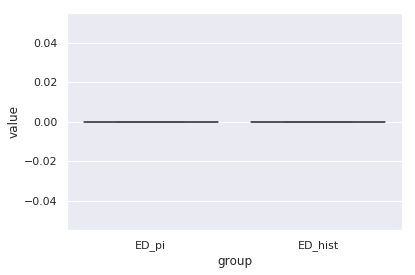

In [22]:
import pandas as pd
ed = pd.DataFrame({ 'group' : np.repeat('ED_pi',10000), 'value': count_elnino_drought_hist })
lf = pd.DataFrame({ 'group' : np.repeat('ED_hist',10000), 'value': count_elnino_drought_pi })
df=ed.append(lf)
sns.boxplot(x='group', y='value', data=df)
plt.savefig('box_whisker_ed_pi_hist.eps', format='eps', dpi=1000)

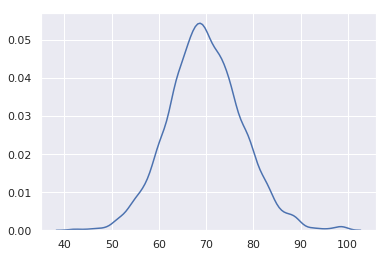

In [13]:
sns.kdeplot(count_elnino_drought_pi)
plt.savefig('pdf_ed_pi.eps', format='eps', dpi=1000)

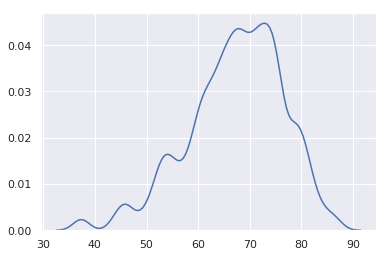

In [14]:
sns.kdeplot(count_elnino_drought_hist)
plt.savefig('pdf_ed_hist.eps', format='eps', dpi=1000)